In [93]:
# Libraries
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [94]:
# Reading data from the Excel
df_shelter = pd.read_excel("INF2178_A1_data.xlsx")

In [95]:
# Display the first 5 row for initial view of data frame
df_shelter.head(5)

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0


In [96]:
# Check information of data frame
df_shelter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50944 entries, 0 to 50943
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   OCCUPANCY_DATE          50944 non-null  datetime64[ns]
 1   ORGANIZATION_NAME       50944 non-null  object        
 2   PROGRAM_ID              50944 non-null  int64         
 3   PROGRAM_NAME            50909 non-null  object        
 4   SECTOR                  50944 non-null  object        
 5   PROGRAM_MODEL           50942 non-null  object        
 6   OVERNIGHT_SERVICE_TYPE  50942 non-null  object        
 7   PROGRAM_AREA            50942 non-null  object        
 8   SERVICE_USER_COUNT      50944 non-null  int64         
 9   CAPACITY_TYPE           50944 non-null  object        
 10  CAPACITY_ACTUAL_BED     32399 non-null  float64       
 11  OCCUPIED_BEDS           32399 non-null  float64       
 12  CAPACITY_ACTUAL_ROOM    18545 non-null  float6

In [97]:
# Display descriptive statistics of data
df_shelter.describe()

,PROGRAM_ID,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
count,50944.000000,50944.000000,32399.000000,32399.000000,18545.000000,18545.000000
mean,13986.125844,45.727171,31.627149,29.780271,55.549259,52.798598
std,1705.288632,53.326049,27.127682,26.379416,59.448805,58.792954
min,11791.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,12233.000000,15.000000,15.000000,14.000000,19.000000,16.000000
50%,14251.000000,28.000000,25.000000,23.000000,35.000000,34.000000
75%,15651.000000,51.000000,43.000000,41.000000,68.000000,66.000000
max,16631.000000,339.000000,234.000000,234.000000,268.000000,268.000000


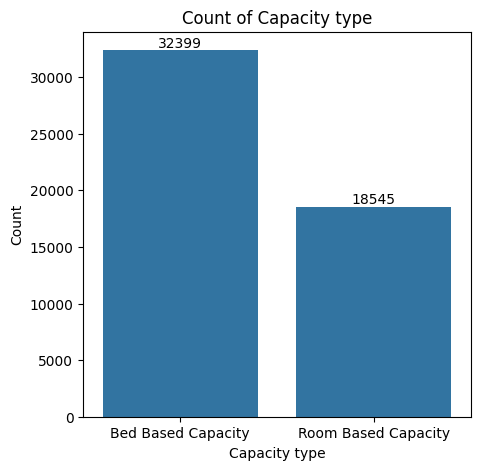

In [98]:
# Visualize counts of capacity type
counts = df_shelter['CAPACITY_TYPE'].value_counts()
plt.figure(figsize=(5, 5))
ax = sns.barplot(x=counts.index, y=counts)

# Add count to the bars
for i, count in enumerate(counts):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10)

plt.title('Count of Capacity type')
plt.xlabel('Capacity type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()




In [99]:
# Create new data frame based on CAPACITY_TYPE and drop irrelevant columns
df_bed_type = df_shelter[df_shelter['CAPACITY_TYPE']=="Bed Based Capacity"]
df_room_type = df_shelter[df_shelter['CAPACITY_TYPE']=="Room Based Capacity"]
df_bed_type.drop(['CAPACITY_ACTUAL_ROOM', 'OCCUPIED_ROOMS'],axis=1, inplace=True)
df_room_type.drop(['CAPACITY_ACTUAL_BED', 'OCCUPIED_BEDS'],axis=1,inplace=True)


<ipython-input-99-86736abe5f66>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bed_type.drop(['CAPACITY_ACTUAL_ROOM', 'OCCUPIED_ROOMS'],axis=1, inplace=True)
<ipython-input-99-86736abe5f66>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_room_type.drop(['CAPACITY_ACTUAL_BED', 'OCCUPIED_BEDS'],axis=1,inplace=True)


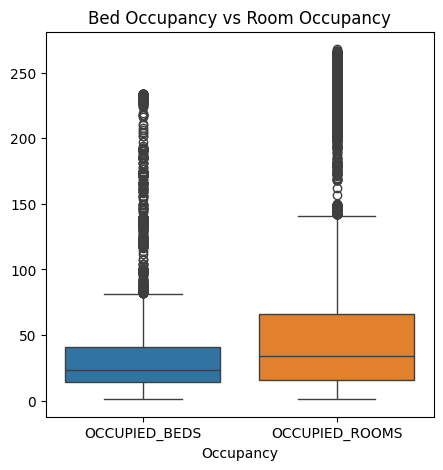

Stats of Bed :
count    32399.000000
mean        29.780271
std         26.379416
min          1.000000
25%         14.000000
50%         23.000000
75%         41.000000
max        234.000000
Name: OCCUPIED_BEDS, dtype: float64
Stats of Room 
count    18545.000000
mean        52.798598
std         58.792954
min          1.000000
25%         16.000000
50%         34.000000
75%         66.000000
max        268.000000
Name: OCCUPIED_ROOMS, dtype: float64


In [100]:
# Visualize Occupancy of both bed and room type by boxplot
plt.figure(figsize=(5, 5))
occupancy_data = [df_bed_type['OCCUPIED_BEDS'],df_room_type['OCCUPIED_ROOMS']]
sns.boxplot(data=occupancy_data)
plt.xlabel('Occupancy')
plt.title('Bed Occupancy vs Room Occupancy')
plt.show()

# print the statistics for Bed and Room
print("Stats of Bed :")
print(df_bed_type['OCCUPIED_BEDS'].describe())
print("Stats of Room ")
print(df_room_type['OCCUPIED_ROOMS'].describe())

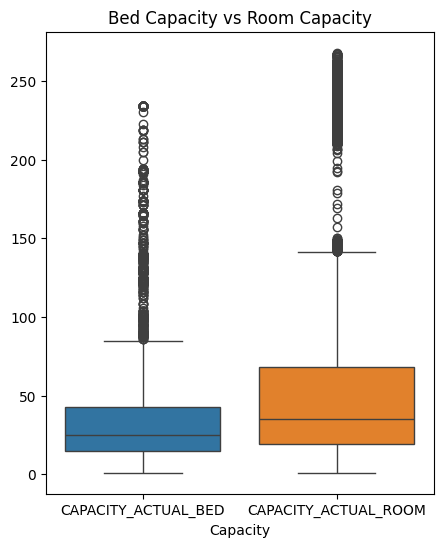

Stats of Bed :
count    32399.000000
mean        31.627149
std         27.127682
min          1.000000
25%         15.000000
50%         25.000000
75%         43.000000
max        234.000000
Name: CAPACITY_ACTUAL_BED, dtype: float64
Stats of Room 
count    18545.000000
mean        55.549259
std         59.448805
min          1.000000
25%         19.000000
50%         35.000000
75%         68.000000
max        268.000000
Name: CAPACITY_ACTUAL_ROOM, dtype: float64


In [101]:
# Visualize Capacity of both bed and room type by boxplot
plt.figure(figsize=(5, 6))
capacity_data = [df_bed_type['CAPACITY_ACTUAL_BED'],df_room_type['CAPACITY_ACTUAL_ROOM']]
sns.boxplot(data=capacity_data)
plt.xlabel('Capacity')
plt.title('Bed Capacity vs Room Capacity')
plt.show()

# print the statistics for Bed and Room
print("Stats of Bed :")
print(df_bed_type['CAPACITY_ACTUAL_BED'].describe())
print("Stats of Room ")
print(df_room_type['CAPACITY_ACTUAL_ROOM'].describe())

<ipython-input-102-3667882e7252>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bed_type['Month'] = df_bed_type['OCCUPANCY_DATE'].dt.month
<ipython-input-102-3667882e7252>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  monthly_capacity_occupancy = df_bed_type.groupby('Month')['OCCUPIED_BEDS','CAPACITY_ACTUAL_BED'].mean().reset_index()


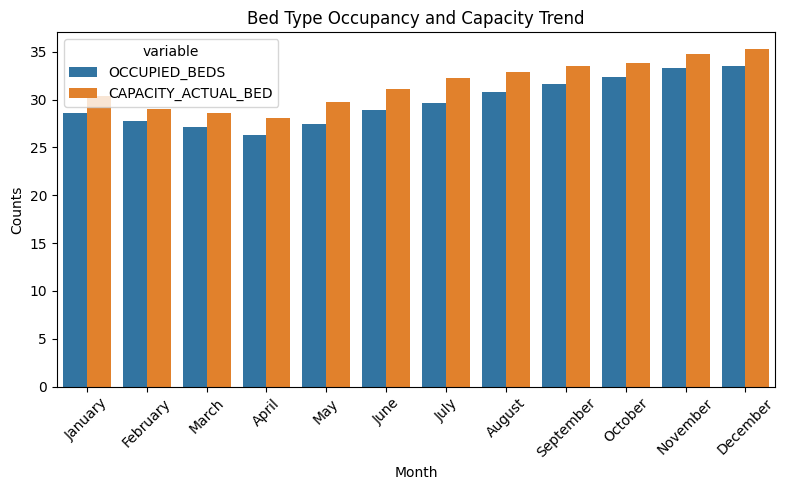

In [102]:
# Fecth  month from date and create month column
df_bed_type['Month'] = df_bed_type['OCCUPANCY_DATE'].dt.month

# Group the data by month and calculate the average occupancy and capacity for each month
monthly_capacity_occupancy = df_bed_type.groupby('Month')['OCCUPIED_BEDS','CAPACITY_ACTUAL_BED'].mean().reset_index()

# Define the month names for better visualization
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Visualize average capacity and occupancy by month
plt.figure(figsize=(8, 5))

# Create the barplot
sns.barplot(x='Month', y='value', hue='variable', data=pd.melt(monthly_capacity_occupancy, ['Month']))
plt.title('Bed Type Occupancy and Capacity Trend')
plt.xlabel('Month')
plt.ylabel('Counts')
plt.xticks(ticks=range(12), labels=month_names, rotation=45)
plt.tight_layout()
plt.show()



<ipython-input-103-0b0f23ea11c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_room_type['Month'] = df_room_type['OCCUPANCY_DATE'].dt.month
<ipython-input-103-0b0f23ea11c4>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  monthly_capacity_occupancy = df_room_type.groupby('Month')['OCCUPIED_ROOMS','CAPACITY_ACTUAL_ROOM'].mean().reset_index()


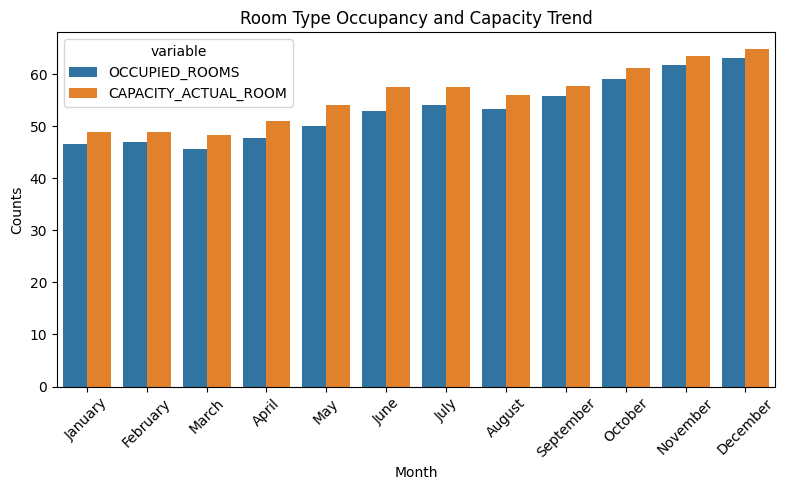

In [103]:
# Fecth  month from date and create month column
df_room_type['Month'] = df_room_type['OCCUPANCY_DATE'].dt.month

# Group the data by month and calculate the average occupancy and capacity for each month
monthly_capacity_occupancy = df_room_type.groupby('Month')['OCCUPIED_ROOMS','CAPACITY_ACTUAL_ROOM'].mean().reset_index()

# Define the month names for better visualization
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Visualize average occupancy and capacity of room type by month
plt.figure(figsize=(8, 5))
sns.barplot(x='Month', y='value', hue='variable', data=pd.melt(monthly_capacity_occupancy, ['Month']))
plt.title('Room Type Occupancy and Capacity Trend')
plt.xlabel('Month')
plt.ylabel('Counts')
plt.xticks(ticks=range(12), labels=month_names, rotation=45)
plt.tight_layout()
plt.show()

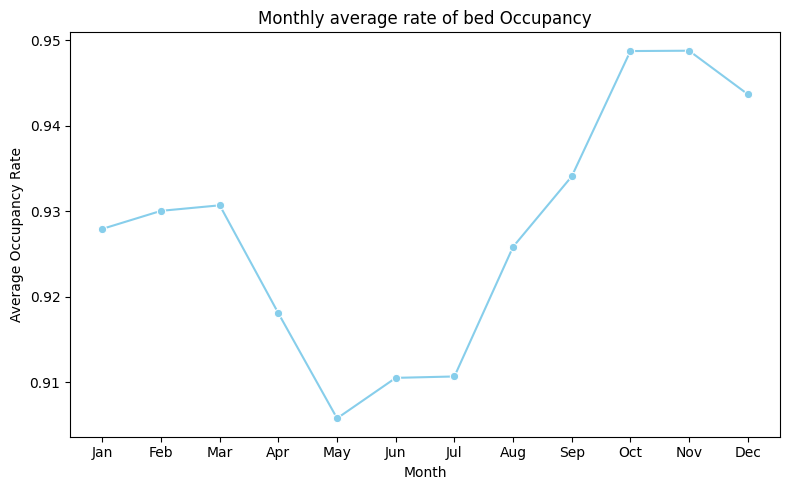

In [104]:
# Group the data by month and calculate the average occupancy rate for each month
monthly_occupancy_rate = df_bed_type.groupby('Month').apply(lambda x: (x['OCCUPIED_BEDS'] / x['CAPACITY_ACTUAL_BED']).mean()).reset_index(name='Avg_Bed_Rate')

# Create a line plot to visualize the seasonal trends in Bed type occupancy rate
plt.figure(figsize=(8, 5))
sns.lineplot(x='Month', y='Avg_Bed_Rate', data=monthly_occupancy_rate, marker='o', color='skyblue')
plt.title('Monthly average rate of bed Occupancy')
plt.xlabel('Month')
plt.ylabel('Average Occupancy Rate')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()


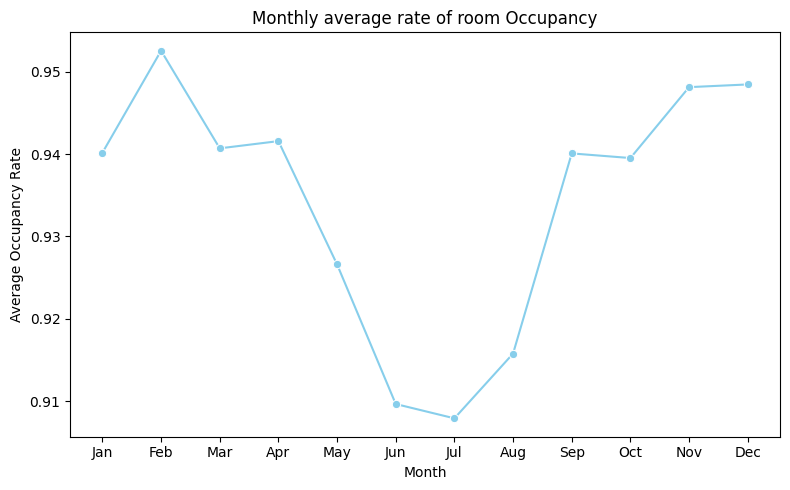

In [105]:
# Group the data by month and calculate the average occupancy rate for each month
monthly_occupancy_rate = df_room_type.groupby('Month').apply(lambda x: (x['OCCUPIED_ROOMS'] / x['CAPACITY_ACTUAL_ROOM']).mean()).reset_index(name='Avg_Room_Rate')

# Create a line plot to visualize the seasonal trends in Room Type occupancy Rate
plt.figure(figsize=(8, 5))
sns.lineplot(x='Month', y='Avg_Room_Rate', data=monthly_occupancy_rate, marker='o', color='skyblue')
plt.title('Monthly average rate of room Occupancy')
plt.xlabel('Month')
plt.ylabel('Average Occupancy Rate')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

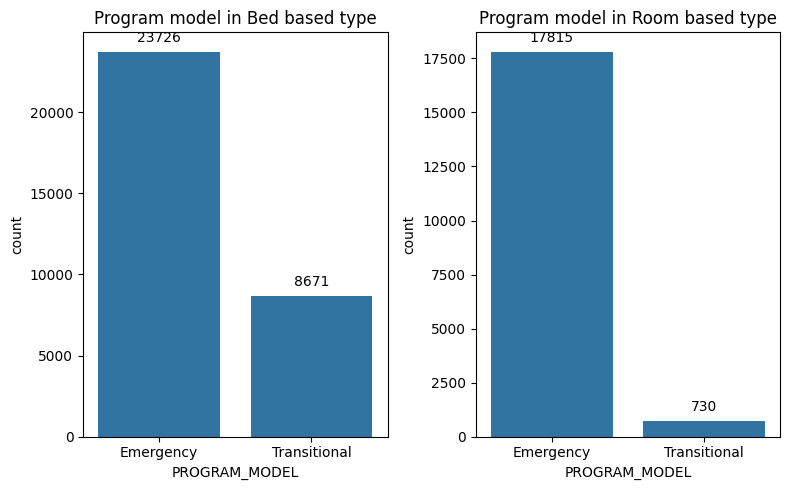

In [106]:
# Visualize counts of capacity type for different PROGRAM_MODEL
# Figure size setup
fig, axs = plt.subplots(1, 2, figsize=(8, 5))

# Define DataFrames and titles
data_frames = [df_bed_type, df_room_type]
titles = ['Program model in Bed based type', 'Program model in Room based type']

# Iterate over axes and corresponding DataFrames
for ax, df, title in zip(axs, data_frames, titles):
    sns.countplot(data=df, x='PROGRAM_MODEL', ax=ax)
    ax.set_title(title)
    # Add count
    for i, p in enumerate(ax.patches):
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 10),
                    textcoords='offset points')

plt.tight_layout()
plt.show()



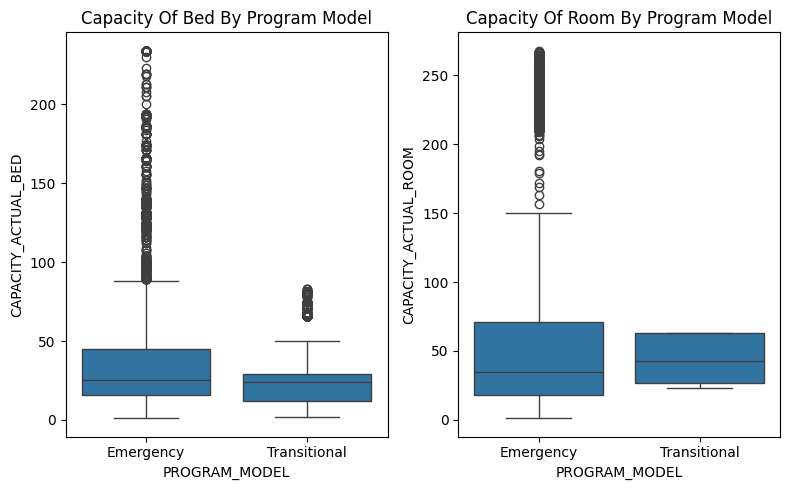

Bed Boxplot Info:
                 count       mean        std  min   25%   50%   75%    max
PROGRAM_MODEL                                                             
Emergency      23726.0  33.833516  29.390146  1.0  16.0  25.0  45.0  234.0
Transitional    8671.0  25.593703  18.342901  2.0  12.0  24.0  29.0   83.0
Room Boxplot Info:
                 count       mean        std   min   25%   50%   75%    max
PROGRAM_MODEL                                                              
Emergency      17815.0  56.010721  60.503601   1.0  18.0  35.0  71.0  268.0
Transitional     730.0  44.287671  17.748494  23.0  27.0  42.5  63.0   63.0


In [107]:
# Visualize Capacity of both bed and room type by boxplot
# Subplots figures
fig, axs = plt.subplots(1, 2, figsize=(8, 5))

# Plot boxplot for PROGRAM_MODEL vs capacity in bed type
sns.boxplot(x='PROGRAM_MODEL', y='CAPACITY_ACTUAL_BED', data=df_bed_type,ax=axs[0])
axs[0].set_title('Capacity Of Bed By Program Model')

# Plot boxplot for PROGRAM_MODEL vs capacity in room type
sns.boxplot(x='PROGRAM_MODEL', y='CAPACITY_ACTUAL_ROOM', data=df_room_type,ax=axs[1])
axs[1].set_title('Capacity Of Room By Program Model')
plt.tight_layout()
plt.show()

# Print the boxplot statistic
bed_stats= df_bed_type.groupby('PROGRAM_MODEL')['CAPACITY_ACTUAL_BED'].describe()
print("Bed Boxplot Info:")
print(bed_stats)

# Print the boxplot statistic
room_stats= df_room_type.groupby('PROGRAM_MODEL')['CAPACITY_ACTUAL_ROOM'].describe()
print("Room Boxplot Info:")
print(room_stats)

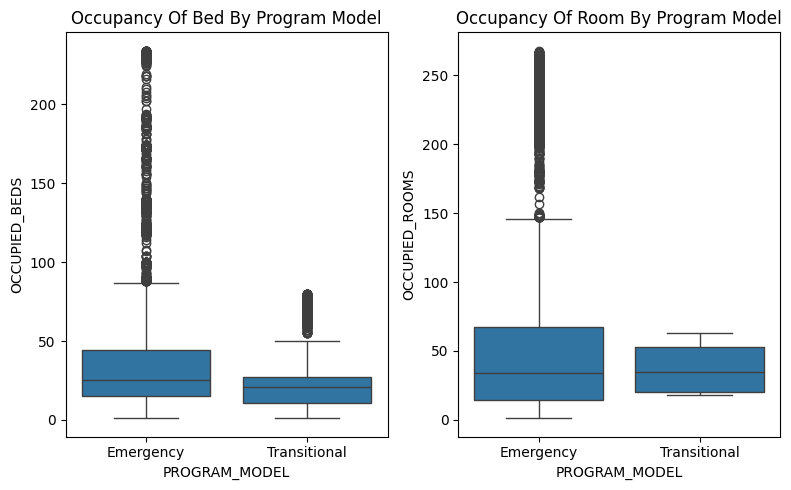

Bed Boxplot Info:
                 count       mean        std  min   25%   50%   75%    max
PROGRAM_MODEL                                                             
Emergency      23726.0  32.182711  28.573265  1.0  15.0  25.0  44.0  234.0
Transitional    8671.0  23.210818  17.526459  1.0  11.0  21.0  27.0   80.0
Room Boxplot Info:
                 count       mean        std   min    25%   50%   75%    max
PROGRAM_MODEL                                                               
Emergency      17815.0  53.433679  59.799883   1.0  14.00  34.0  67.0  268.0
Transitional     730.0  37.300000  17.114931  18.0  20.25  35.0  53.0   63.0


In [108]:
# Visualize Occupancy of both bed and room type by boxplot
# Subplots figures
fig, axs = plt.subplots(1, 2, figsize=(8, 5))

# Plot boxplot for PROGRAM_MODEL vs Occupancy in room type
sns.boxplot(x='PROGRAM_MODEL', y='OCCUPIED_BEDS', data=df_bed_type,ax=axs[0])
axs[0].set_title('Occupancy Of Bed By Program Model')

# Plot boxplot for PROGRAM_MODEL vs Occupancy in room type
sns.boxplot(x='PROGRAM_MODEL', y='OCCUPIED_ROOMS', data=df_room_type,ax=axs[1])
axs[1].set_title('Occupancy Of Room By Program Model')
plt.tight_layout()
plt.show()

# Print the boxplot statistic
bed_stats= df_bed_type.groupby('PROGRAM_MODEL')['OCCUPIED_BEDS'].describe()
print("Bed Boxplot Info:")
print(bed_stats)

# Print the boxplot statistic
room_stats= df_room_type.groupby('PROGRAM_MODEL')['OCCUPIED_ROOMS'].describe()
print("Room Boxplot Info:")
print(room_stats)

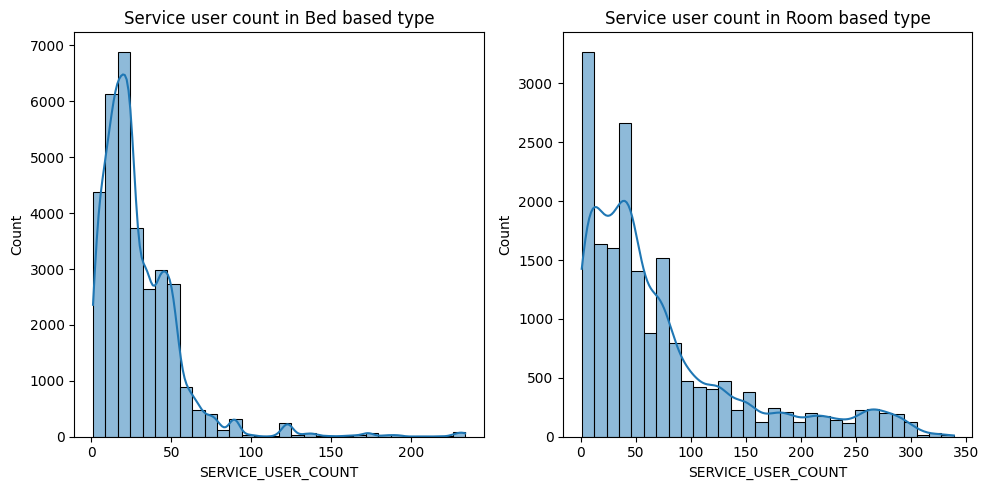

In [109]:
# Histogram for service user count in bed and room type
# Subplots figures
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot histplot for SERVICE_USER_COUNT of bed type
sns.histplot(data=df_bed_type, x='SERVICE_USER_COUNT', bins=30,ax=axs[0],kde=True)
axs[0].set_title('Service user count in Bed based type')

# Plot histplot for SERVICE_USER_COUNT of room type
sns.histplot(data=df_room_type, x='SERVICE_USER_COUNT', bins=30,ax=axs[1],kde=True)
axs[1].set_title('Service user count in Room based type')
plt.tight_layout()
plt.show()

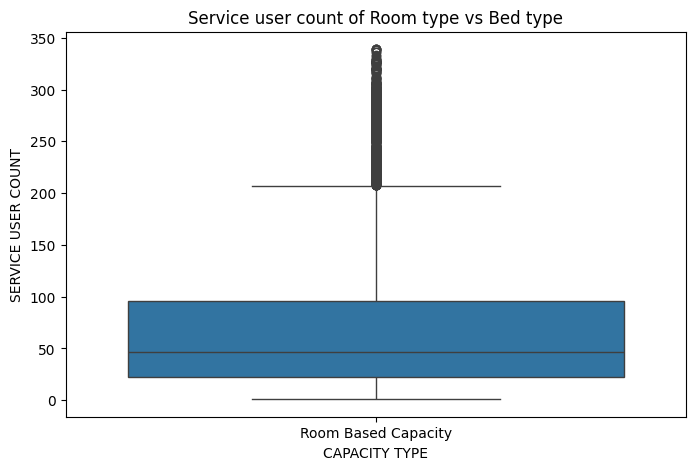

Service user of bed based
count    32399.000000
mean        29.780271
std         26.379416
min          1.000000
25%         14.000000
50%         23.000000
75%         41.000000
max        234.000000
Name: SERVICE_USER_COUNT, dtype: float64
Service user of room based
count    18545.000000
mean        73.587166
std         73.319030
min          1.000000
25%         22.000000
50%         47.000000
75%         96.000000
max        339.000000
Name: SERVICE_USER_COUNT, dtype: float64


In [110]:
# Set the figure size
plt.figure(figsize=(8, 5))

# Plot boxplot for SERVICE_USER_COUNT vs capacity type
sns.boxplot(data=df_room_type, y='SERVICE_USER_COUNT', x='CAPACITY_TYPE')
plt.xlabel('CAPACITY TYPE')
plt.ylabel('SERVICE USER COUNT')
plt.title('Service user count of Room type vs Bed type')
plt.show()

service_user_bed = df_bed_type['SERVICE_USER_COUNT'].describe()
service_user_room = df_room_type['SERVICE_USER_COUNT'].describe()
print("Service user of bed based")
print(service_user_bed)
print("Service user of room based")
print(service_user_room)


In [111]:
# Calculate the occupancy rate
df_bed_type['OCCUPANCY_RATE'] = df_bed_type['OCCUPIED_BEDS'] / df_bed_type['CAPACITY_ACTUAL_BED']
df_room_type['OCCUPANCY_RATE'] = df_room_type['OCCUPIED_ROOMS'] / df_room_type['CAPACITY_ACTUAL_ROOM']


# Perform t-test for CAPACITY_ACTUAL_BED and CAPACITY_ACTUAL_ROOM
t_stat_c, p_val_c= stats.ttest_ind(df_bed_type['CAPACITY_ACTUAL_BED'], df_room_type['CAPACITY_ACTUAL_ROOM'],equal_var = False)

# Perform t-test for OCCUPIED_BEDS and OCCUPIED_ROOMS
t_stat_o, p_val_o = stats.ttest_ind(df_bed_type['OCCUPIED_BEDS'], df_room_type['OCCUPIED_ROOMS'], equal_var = False)

# Perform t-test for SERVICE_USER_COUNT for bed and room type
t_stat_s, p_val_s= stats.ttest_ind(df_bed_type['SERVICE_USER_COUNT'], df_room_type['SERVICE_USER_COUNT'], equal_var = False)

# Perform t-test for Occupied rate for bed and room type
t_stat_r, p_val_r= stats.ttest_ind(df_bed_type['OCCUPANCY_RATE'], df_room_type['OCCUPANCY_RATE'], equal_var = False)

# Print the results
print("T-test for CAPACITY_ACTUAL_BED and CAPACITY_ACTUAL_ROOM")
print("T-statistic:", t_stat_c)
print("P-value:",p_val_c)
print('\n')
print("T-test for OCCUPIED_BEDS and OCCUPIED_ROOMS")
print("T-statistic:",t_stat_o)
print("P-value:",p_val_o)
print('\n')
print("T-test for SERVICE_USER_COUNT for bed and room type:")
print("T-statistic:", t_stat_s)
print("P-value:", p_val_s)
print('\n')
print("T-test for occupied rate for bed and room type:")
print("T-statistic:", t_stat_r)
print("P-value:", p_val_r)
print('\n')

T-test for CAPACITY_ACTUAL_BED and CAPACITY_ACTUAL_ROOM
T-statistic: -51.7986147216613
P-value: 0.0


T-test for OCCUPIED_BEDS and OCCUPIED_ROOMS
T-statistic: -50.48695539984032
P-value: 0.0


T-test for SERVICE_USER_COUNT for bed and room type:
T-statistic: -78.50868849938448
P-value: 0.0


T-test for occupied rate for bed and room type:
T-statistic: -4.498751771925636
P-value: 6.860477551487939e-06




<ipython-input-111-4342873942a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bed_type['OCCUPANCY_RATE'] = df_bed_type['OCCUPIED_BEDS'] / df_bed_type['CAPACITY_ACTUAL_BED']
<ipython-input-111-4342873942a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_room_type['OCCUPANCY_RATE'] = df_room_type['OCCUPIED_ROOMS'] / df_room_type['CAPACITY_ACTUAL_ROOM']
